# Libraries and Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install lifelines

In [2]:
%cd /content/drive/MyDrive/Statistics with Python/Regression Analysis/Capstone Project: Surviving the App-pocalypse

/content/drive/MyDrive/Statistics with Python/Regression Analysis/Capstone Project: Surviving the App-pocalypse


In [4]:
# Main Libraries
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
from lifelines.utils import concordance_index
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the data
df = pd.read_csv("googleplaystore.csv")

# Display the first few rows to ensure it's loaded correctly
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Data Cleaning

In [6]:
# DF info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
#Dropping the first variable
df = df.iloc[:,1:]
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
# Category variable
df.Category.value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [9]:
# Removing the row with the Category value "1.9"
df = df[df['Category'] != '1.9']

In [10]:
# Reviews variable to Numeric
df['Reviews'] = pd.to_numeric(df['Reviews'])

In [12]:
# Size variable
df.Size.unique

<bound method Series.unique of 0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10840, dtype: object>

In [13]:
# Function to convert size to numerical value (in megabytes)
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1000
    elif size == 'Varies with device':
        return np.nan
    else:
        return size

# Apply the conversion function to the "Size" column
df['Size'] = df['Size'].apply(convert_size)

# Optionally, you might want to handle missing values (e.g., fill with mean)
df['Size'] = df['Size'].fillna(df['Size'].mean())

In [14]:
# Install variable
df.Installs.value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [15]:
#Install variable
df['Installs'] = df['Installs'].str.replace(',', '', regex=False)
df['Installs'] = df['Installs'].str.replace('+', '', regex=False).astype(int)

<ipython-input-15-ba5c61427fb9>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)


In [16]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [17]:
# Type variabe
df.Type.value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

In [20]:
# Price variable
df.Price.value_counts()
# Remove the dollar sign and convert to float
df['Price'] = df['Price'].str.replace('$', '', regex=False).astype(float)

In [22]:
# Content Rating
df['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [23]:
# List of categories to remove
categories_to_remove = ['Adults only 18+', 'Unrated']

# Keep only the rows that do not contain the specified categories
df = df[~df['Content Rating'].isin(categories_to_remove)]

# Verify the change
df['Content Rating'].value_counts()

Everyone        8714
Teen            1208
Mature 17+       499
Everyone 10+     414
Name: Content Rating, dtype: int64

In [24]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [27]:
# Genre
df.Genres.value_counts()

Tools                                841
Entertainment                        622
Education                            549
Medical                              463
Business                             460
                                    ... 
Parenting;Brain Games                  1
Travel & Local;Action & Adventure      1
Lifestyle;Pretend Play                 1
Tools;Education                        1
Strategy;Creativity                    1
Name: Genres, Length: 119, dtype: int64

In [28]:
# Picking the variables
df_select = df.drop(columns = ["Genres", "Current Ver",	"Android Ver"])

# Dependent variable

In [36]:
# App churn is when the app was not updated in 6 months
df_select['Last Updated']

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10836       July 25, 2017
10837        July 6, 2018
10838    January 20, 2017
10839    January 19, 2015
10840       July 25, 2018
Name: Last Updated, Length: 10835, dtype: object

In [37]:
# Convert 'Last Updated' to datetime
df_select['Last Updated'] = pd.to_datetime(df_select['Last Updated'])

# Get the maximum date
max_date = df_select['Last Updated'].max()

# Calculate the date 6 months before the maximum date
threshold_date = max_date - pd.DateOffset(months=6)

# Create a 'churn' variable, 1 if the last update was before the threshold date, 0 otherwise
df_select['churn'] = (df_select['Last Updated'] < threshold_date).astype(int)

# Display the new column to verify
df_select[['Last Updated', 'churn']].head()

,Last Updated,churn
0,2018-01-07,1
1,2018-01-15,1
2,2018-08-01,0
3,2018-06-08,0
4,2018-06-20,0


In [39]:
# MEan the of the churn variable
df_select.churn.mean()

0.3571758191047531

In [40]:
# Create a new variable with the duration in days since the last update compared to the max date
df_select['days_since_last_update'] = (max_date - df_select['Last Updated']).dt.days

# Display the new column to verify
df_select[['Last Updated', 'days_since_last_update']].head()

,Last Updated,days_since_last_update
0,2018-01-07,213
1,2018-01-15,205
2,2018-08-01,7
3,2018-06-08,61
4,2018-06-20,49


In [41]:
#Data
df_select.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,churn,days_since_last_update
0,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,2018-01-07,1,213
1,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,2018-01-15,1,205
2,ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,2018-08-01,0,7
3,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,2018-06-08,0,61
4,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,2018-06-20,0,49


In [42]:
# Remove last updated variable
df_final = df_select.drop(columns = ["Last Updated"])

# KME comparing Free vs Paid apps

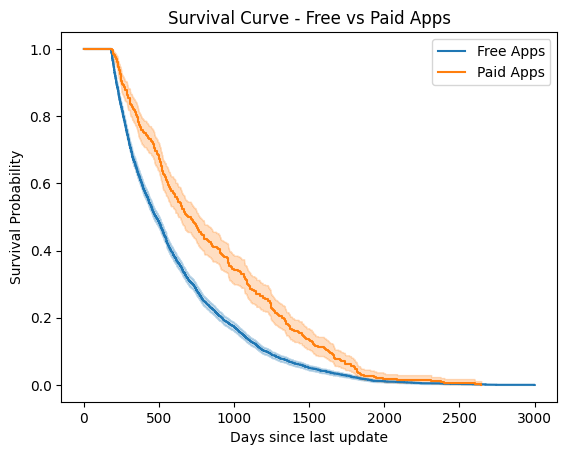

In [43]:
from lifelines import KaplanMeierFitter

# Create a Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Divide the data into free and paid apps
free_apps = df_final[df_final['Type'] == 'Free']
paid_apps = df_final[df_final['Type'] == 'Paid']

# Fit the estimator to the free apps
kmf.fit(free_apps['days_since_last_update'],
        event_observed=free_apps['churn'],
        label='Free Apps')
ax = kmf.plot()

# Fit the estimator to the paid apps
kmf.fit(paid_apps['days_since_last_update'],
        event_observed=paid_apps['churn'],
        label='Paid Apps')
kmf.plot(ax=ax)

plt.title('Survival Curve - Free vs Paid Apps')
plt.xlabel('Days since last update')
plt.ylabel('Survival Probability')
plt.show()

# Cox Model creation and assessment

In [46]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10835 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Category                10835 non-null  object 
 1   Rating                  9362 non-null   float64
 2   Reviews                 10835 non-null  int64  
 3   Size                    10835 non-null  float64
 4   Installs                10835 non-null  int64  
 5   Type                    10834 non-null  object 
 6   Price                   10835 non-null  float64
 7   Content Rating          10835 non-null  object 
 8   churn                   10835 non-null  int64  
 9   days_since_last_update  10835 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 931.1+ KB


In [47]:
# Remove NaN
df_final = df_final.dropna()

In [48]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Transform categorical variables into dummy variables
df_final_dummies = pd.get_dummies(df_final,
                                  columns=['Category',
                                           'Type',
                                           'Content Rating'],
                                  drop_first=True)

# Split data into training and testing sets (80% training, 20% testing)
train, test = train_test_split(df_final_dummies,
                               test_size=0.2,
                               random_state=1502)

# Create an instance of the Cox Proportional Hazards fitter
cph = CoxPHFitter()

# Fit the CoxPH model to the training dataset
cph.fit(train, duration_col='days_since_last_update', event_col='churn')

# Print summary statistics of the fitted model
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 7489 total observations, 4969 right-censored observations>
             duration col = 'days_since_last_update'
                event col = 'churn'
      baseline estimation = breslow
   number of observations = 7489
number of events observed = 2520
   partial log-likelihood = -17081.48
         time fit was run = 2023-08-12 10:12:55 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                            
Rating                         0.11       1.11       0.04             0.03             0.19                 1.03                 1.20
Reviews                       -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Size                           0.01       1.01       0.00             0.01             0.01                 1.01                 1.01
Installs                       0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
Price                          0.00       1.00       0.00             0.00             0.01                 1.00                 1.01
Category_AUTO_AND_VEHICLES    -1.21       0.30       0.48            -2.16            -0.26                 0.11                 0.77
Category_BEAUTY               -0.27       0.77       0.51            -1.26             0.73                 0.28                 2.08
Category_BOOKS_AND_REFERENCE  -1.28       0.28       0.33            -1.92            -0.64                 0.15                 0.53
Category_BUSINESS             -1.17       0.31       0.32            -1.80            -0.53                 0.17                 0.59
Category_COMICS               -0.60       0.55       0.44            -1.45             0.26                 0.23                 1.30
Category_COMMUNICATION        -1.23       0.29       0.32            -1.87            -0.60                 0.15                 0.55
Category_DATING               -0.40       0.67       0.41            -1.21             0.40                 0.30                 1.50
Category_EDUCATION            -1.15       0.32       0.34            -1.82            -0.49                 0.16                 0.62
Category_ENTERTAINMENT        -0.84       0.43       0.44            -1.70             0.03                 0.18                 1.03
Category_EVENTS               -0.27       0.77       0.43            -1.10             0.57                 0.33                 1.77
Category_FAMILY               -1.33       0.26       0.31            -1.93            -0.73                 0.14                 0.48
Category_FINANCE              -1.02       0.36       0.33            -1.67            -0.37                 0.19                 0.69
Category_FOOD_AND_DRINK       -0.61       0.55       0.48            -1.56             0.35                 0.21                 1.41
Category_GAME                 -1.71       0.18       0.31            -2.31            -1.10                 0.10                 0.33
Category_HEALTH_AND_FITNESS   -1.31       0.27       0.33            -1.97            -0.65                 0.14                 0.52
Category_HOUSE_AND_HOME       -1.77       0.17       0.47            -2.68            -0.86                 0.07                 0.42
Category_LIBRARIES_AND_DEMO   -1.48       0.23       0.35            -2.16            -0.80                 0.11                 0.45
Category_LIFESTYLE            -1.25       0.29       0.32            -1.87            -0.62                 0.15                 0.54
Category_MAPS_AND_NAVIGATION  -1.06       0.35       0.36            -1.77            -0.35                 0.17                 0.70
Category_MEDICAL              -1.39       0.25       0.32            -2.02            -0.76                 0.13                 0.47
C

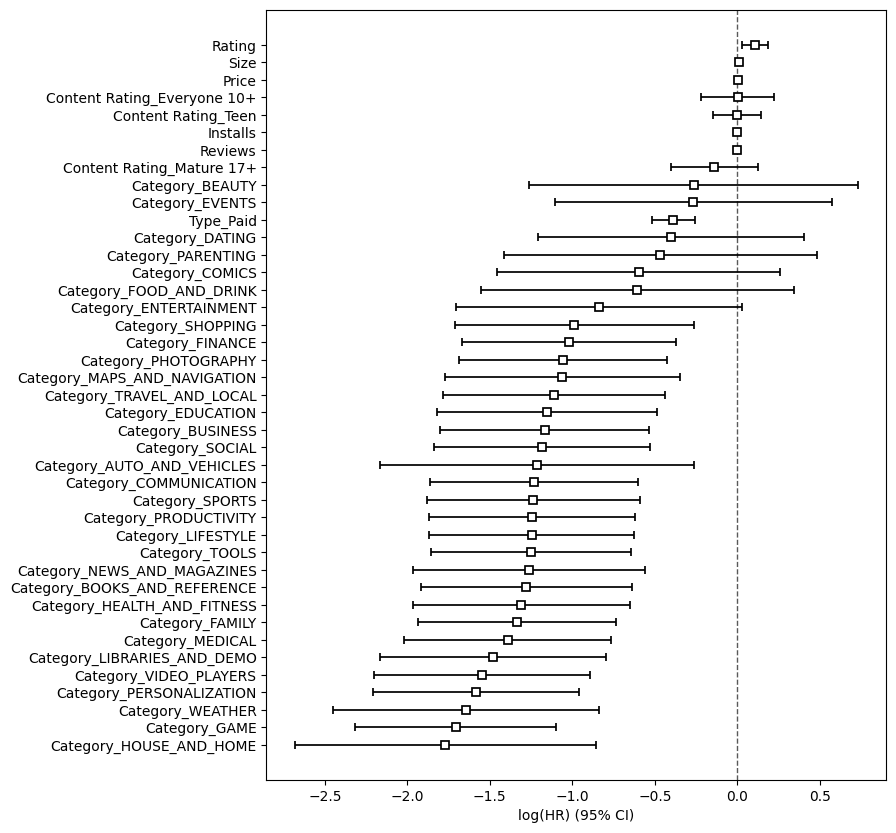

In [50]:
# Plot the coefficients
plt.figure(figsize = (8,10))
cph.plot()
plt.show()

In [51]:
# Assessing model on the test set using Concordance Index
c_index = concordance_index(test['days_since_last_update'],
                            -cph.predict_partial_hazard(test),
                            test['churn'])
print(f"Concordance Index on the Test Set: {c_index}")

Concordance Index on the Test Set: 0.6004358495933195


In [52]:
# Check the proportional hazards assumption
cph.check_assumptions(train)

The ``p_value_threshold`` is set at 0.01. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 7489 total observations, 4969 right-censored observations>
         test_name = proportional_hazard_test

---
                                   test_statistic      p  -log2(p)
Category_AUTO_AND_VEHICLES   km              0.17   0.68      0.55
                             rank            0.17   0.68      0.55
Category_BEAUTY              km              0.25   0.61      0.70
                             rank            0.25   0.62      0.70
Category_BOOKS_AND_REFERENCE km              0.16   0.69      0.54
                             rank            0.16   0.69      0.53
Category_BUSINESS            km              0.81   0.37      1.44
                             rank            0.81   0.37      1.44
Category_COMICS              km              0.47   0.49      1.02
                             rank            0.47   0.49      1.02
Category_COMMUNICATION       km              0.33   0.57      0.82
                             rank            0.33   0.57      0.81
Category_DATING              km              0.07   0.80      0.33
                             rank            0.07   0.80      0.33
Category_EDUCATION           km              0.82   0.36      1.45
                             rank            0.82   0.37      1.45
Category_ENTERTAINMENT       km              3.32   0.07      3.87
                             rank            3.35   0.07      3.90
Category_EVENTS              km              0.02   0.88      0.19
                             rank            0.02   0.88      0.19
Category_FAMILY              km              0.67   0.41      1.27
                             rank            0.67   0.41      1.27
Category_FINANCE             km              2.81   0.09      3.42
                             rank            2.81   0.09      3.41
Category_FOOD_AND_DRINK      km              0.02   0.90      0.15
                             rank            0.02   0.90      0.16
Category_GAME                km              0.75   0.39      1.37
                             rank            0.75   0.39      1.37
Category_HEALTH_AND_FITNESS  km              2.26   0.13      2.91
                             rank            2.26   0.13      2.91
Category_HOUSE_AND_HOME      km              0.20   0.66      0.61
                             rank            0.20   0.66      0.61
Category_LIBRARIES_AND_DEMO  km              0.00   0.99      0.01
                             rank            0.00   0.97      0.04
Category_LIFESTYLE           km              0.19   0.66      0.60
                             rank            0.19   0.66      0.59
Category_MAPS_AND_NAVIGATION km              2.94   0.09      3.53
                             rank            2.94   0.09      3.53
Category_MEDICAL             km              1.79   0.18      2.47
                             rank            1.79   0.18      2.47
Category_NEWS_AND_MAGAZINES  km              0.00   0.98      0.03
                             rank            0.00   0.98      0.03
Category_PARENTING           km              0.01   0.93      0.11
                             rank            0.01   0.93      0.11
Category_PERSONALIZATION     km              0.01   0.92      0.11
                             rank            0.01   0.92      0.11
Category_PHOTOGRAPHY         km              0.35   0.56      0.85
                             rank            0.35   0.56      0.85
Category_PRODUCTIVITY        km              0.47   0.49      1.02
                             rank            0.47   0.49      1.03
Category_SHOPPING            km              2.66   0.10      3.28
                             rank            2.67   0.10      3.29
Category_SOCIAL              km              0.34   0.56      0.84
                             rank            0.35   0.56      0.85
Category_SPORTS              km     



1. Variable 'Size' failed the non-proportional test: p-value is 0.0007.

   Advice 1: the functional form of the variable 'Size' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'Size' using pd.cut, and then specify it in `strata=['Size',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'Installs' failed the non-proportional test: p-value is 0.0048.

   Advice 1: the functional form of the variable 'Installs' might be incorrect. That is, there may
be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advic

[]

# Insight

1) Paid apps are more likely to get updated (to survive)

2) The Rating affects the App churn positively